# Entanglement
$\def\cvec#1{\left[\begin{array}{c} #1 \end{array}\right]} \def\ket#1{\mid #1 \rangle} \def\bra#1{\langle #1 \mid}$

## 1. Multiple Qubits and Gates

여러개의 큐빗은 Kroneker Product를 통해서 다차원 벡터로 표현된다.  
예컨데, 
$\ket{\psi } = \ket{\psi_1 ,\psi_2} = \ket{\psi_1}\otimes \ket{\psi_2} = \cvec{\psi_{11} \\ \psi_{12}} \otimes \cvec{\psi_{21} \\ \psi_{22}} =\cvec{\psi_{11}\cvec{\psi_{21} \\ \psi_{22}} \\ \psi_{12}\cvec{\psi_{21} \\ \psi_{22}}}= \cvec{\psi_{11}\psi_{21} \\ \psi_{11}\psi_{22} \\ \psi_{12}\psi_{21} \\\psi_{12}\psi_{22}}$로 표현된다.  

따라서 n개의 큐빗은 $2^n$차원 벡터로 표현된다. 다음의 예시를 살펴보자.

$\ket{10} = \cvec{0 \\ 1} \otimes \cvec{1 \\ 0} = \cvec{0 \cvec{1 \\ 0} \\ 1 \cvec{1 \\ 0}} = \cvec{0 \\ 0 \\ 1 \\ 0 }$  
$\ket{110} = \cvec{0 \\ 1}  \otimes \cvec{0 \\ 1} \otimes \cvec{1 \\ 0} = \cvec{0 \\ 1} \otimes  \cvec{0 \\ 0 \\ 1 \\ 0 } = \cvec{0 \\ 0 \\ \vdots \\ 1 \\ 0 }$

이것이 굉장히 단순한 구조인만큼 몇가지 규칙을 만들어 낸다. 
다음을 살펴보자. 
- $\ket{j} = \ket{j_{(2)}} = ?$
- $\bra{j} \ket{k} = ?$
- $\bra{j} \ket{j} = ?$

위의 정답은 다음과 같다.  
- $\ket{j} = \ket{j_{(2)}} = e_{j+1}$
- $\bra{j} \ket{k} = 0$
- $\bra{j} \ket{j} = 1$  

이는 $\ket{j}$가 j+1 번째만 1인 Orthonormal Vector 임을 의미하며,  
추후 있을 여러 계산들을 굉장히 용이하게 만들어 준다.  
이러한 유용한 성질들 덕분에, $\ket{j}$ 집합을 Computational Basis라고 부른다. 

다음과 같은 회로를 살펴보자.  

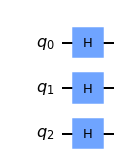

In [3]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
qc = QuantumCircuit(3)

for qubit in range(3):
    qc.h(qubit)

qc.draw("mpl")

하다마드 게이트를 $\ket{0}$에 적용시킨 결과물은 다음과 같다.  
$$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \frac{1}{\sqrt{2}}\cvec{1 \\ 1}$$  
위 회로는 이 세가지 큐빗이 존재하므로 아래처럼 8차원 벡터로 표현될 수 있다.   
$$\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \otimes \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \otimes \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \\ = \frac{1}{2\sqrt{2}}\cvec{1 \\ 1}\cvec{1 \\ 1} \cvec{1 \\ 1} = \frac{1}{2\sqrt{2}} [1,1,1,1,1,1,1,1]^t$$  


이 큐빗을 다른 식으로 쓰면 다음과 같이 쓸 수 있다.  

$$\ket{\psi} = \frac{1}{2\sqrt{2}}\ket{000}+\frac{1}{2\sqrt{2}}\ket{001}+\frac{1}{2\sqrt{2}}\ket{010}+\frac{1}{2\sqrt{2}}\ket{011}\\ +\frac{1}{2\sqrt{2}}\ket{100}+\frac{1}{2\sqrt{2}}\ket{101}+\frac{1}{2\sqrt{2}}\ket{110}+\frac{1}{2\sqrt{2}}\ket{111}$$

이를 해석하면 각 000~111의 상태가 나올 확률가 모두 $(\frac{1}{2\sqrt{2}})^2=\frac{1}{8}$이며 유니폼 분포라고 인식할 수 있다.  
실제 결과를 살펴보자.  

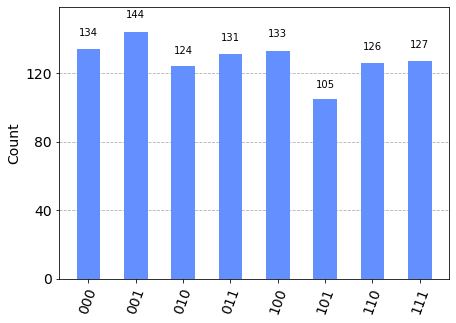

In [4]:
qc.measure_all()
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

여러개의 큐빗을 Kroneker Product로 표현하는것과 마찬가지로, 여러개의 큐빗에 적용되는 게이트 또한 Kroneker Product로 표현할 수 있다.  
$X \otimes H = \cvec{ 0 & 1 \\ 1& 0} \otimes \cvec{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} = \cvec{ 0\cvec{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 1 \cvec{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} \\ 1 \cvec{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 0 \cvec{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}} = \cvec{ 0 & 0 &\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} &0 &0 \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0& 0}$


이 멀티게이트가 멀티큐빗에 적용될때는 $(U_1 \otimes U_2)(v_1 \otimes v_2) = U_1v_1 \otimes U_2v_2$ 공식을 사용할 수 있다.  
따라서 위의 $X \otimes H$ 게이트가 $\ket{00},\ket{01},\ket{10},\ket{11}$에 적용될때 어떤 방식으로 적용되는지를 계산할 수 있다. 

\[실제로 해보기\]

위의 공식이 실제로 들어맞는지를 확인해보자. 

In [12]:
qc = QuantumCircuit(2,2)
qc.i(0);qc.i(1)
#qc.i(0);qc.x(1)
#qc.x(0);qc.i(1)
#qc.x(0);qc.x(1)
qc.barrier()
qc.x(0)
qc.h(1)
qc.measure(1)
qc.draw("mpl")

TypeError: measure() missing 1 required positional argument: 'cbit'

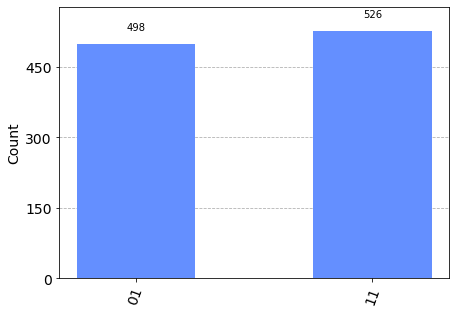

In [17]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## 2. Multi Qubit Gate

양자 컴퓨터의 얽힘을 만들기 위해서는 두 큐빗에 동시에 작용하면서 두 큐빗을 얽혀내는 게이트가 필요하다. 이를 시행해주는 가장 대표적인 Gate가 Cnot게이트이다

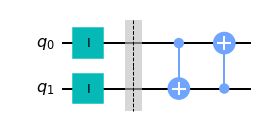

In [13]:
qc = QuantumCircuit(2)

qc.i(0);qc.i(1)
#qc.i(0);qc.x(1)
#qc.x(0);qc.i(1)
#qc.x(0);qc.x(1)

qc.barrier()

qc.cx(0,1)
qc.cx(1,0)

qc.draw("mpl")

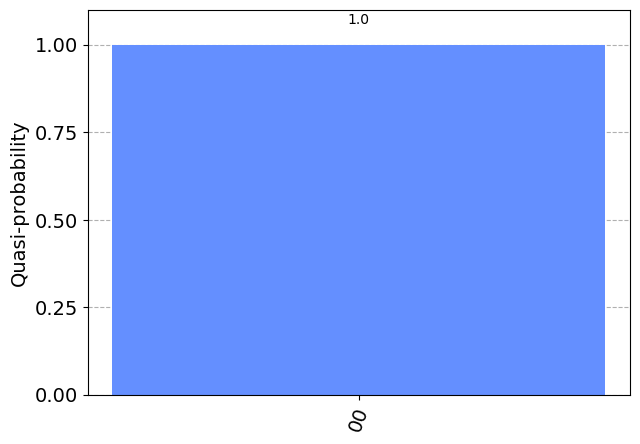

In [6]:
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

CNOT Gate 는 $(\ket{0}\bra{0}\otimes I + \ket{1}\bra{1} \otimes X)$의 구조를 가지고 있다.  
\[ $\ket{00},\ket{01},\ket{10},\ket{11}$에 대해 직접 해보자.\]

여기에 Hadamard 게이트를 붙이면 두 큐빗의 결과물이 완전히 일치하게끔만 나오는 Bell's State가 된다.  

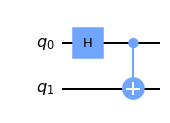

In [14]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw("mpl")

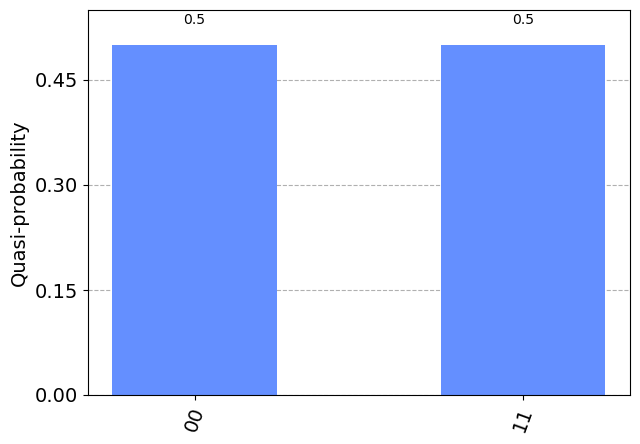

In [8]:
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## 3. Circuit Identity

게이트는 결국엔 행렬이므로 여러개의 게이트를 반복해서 써도 결국은 하나의 단일 게이트로 표현될 수 있다.  
따라서 몇몇 특수한 회로의 경우, 다른 회로와 똑같은 역할을 할 수 있다.  

SWAP Gate를 살펴보자. 

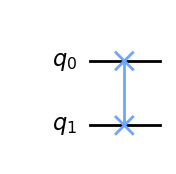

In [9]:
qc = QuantumCircuit(2)
qc.swap(0,1)
qc.draw("mpl")

이 스왑게이트는 두 큐빗을 서로 바꿔주는 게이트이다. 즉 다음과 같이 작동한다.  
$$SWAP(\ket{\psi_1 \psi_2}) = \ket{\psi_2 \psi_1}$$  

그런데, 다음의 회로도 살펴보도록 하자.  

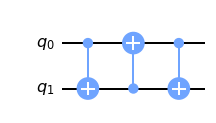

In [19]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw("mpl")

각 큐빗을 $\ket{\psi_1} = a\ket{0}+b \ket{1} , \ket{\psi_2} = c \ket{0}+d \ket{1}$으로 정의하자.  
위 회로의 수식을 따라가면 다음과 같이 표시할 수 있다.   


$\ket{\psi_1}\ket{\psi_2} = ac\ket{00}+ad\ket{01}+bc\ket{10}+bd\ket{11} 
\\ \Rightarrow  ac\ket{00}+ad\ket{01}+bc\ket{11}+bd\ket{10}  
\\ \Rightarrow  ac\ket{00}+ad\ket{11}+bc\ket{01}+bd\ket{10}
\\ \Rightarrow  ac\ket{00}+ad\ket{10}+bc\ket{01}+bd\ket{11}
\\ = (c\ket{0}+d\ket{1})(a\ket{0}+b\ket{1}) \\ = \ket{\psi_2}\ket{\psi_1}$  

- 즉 CNOT Gate를 교차로 세번쓴 회로는 SWAP게이트와 일치한다. 

- 이런 방식으로 모든 회로는 다른 회로로 다시 바꿀 수 있다.  
- 실제 양자 컴퓨터를 구현할 때는 정의된 모든 게이트를 물리적으로 구현하는 것이 아니라 몇가지만 구현함으로써 이를 대체한다.  

cf)  
- Solvay-Kitaev Theorem은 $SU(2)$에 있는 어떤 행렬이든 유한한 개수만큼의 행렬의 선형결합으로 표현가능하다는 정리이다.  
- 양자컴퓨터에서는 어떤 모양의 게이트이던 X,Y,Z를 이용해서 표현가능하다는 의미로 이해 할 수 있다.  
- 따라서 양자 알고리즘을 구현하기 위해서는 몇가지 개수만큼의 게이트만 있으면 된다는 것의 이론적 뒷받침이 된다. 

## 4. Quiz
아래 회로의 결과를 예측해보자. 

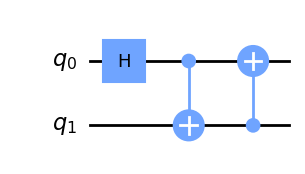

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.cx(1,0)
qc.draw("mpl")

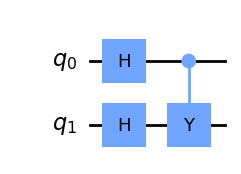

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cy(0,1)
qc.draw("mpl")

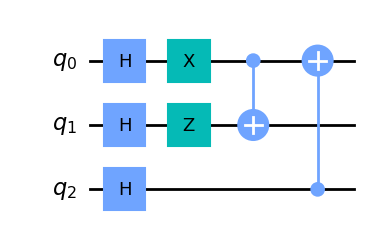

In [13]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(0)
qc.z(1)
qc.cx(0,1)
qc.cx(2,0)
qc.draw("mpl")